In [1]:
# Standard Error of Mean
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import scikit_posthocs as sp
import seaborn as sns
from scipy import stats

C:\Users\sulei\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
C:\Users\sulei\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv(r"C:\Users\sulei\Documents\Acetylated_Tubulin_intensity_data.csv")

df_mean = (df.groupby('label', as_index=False).mean()).T
df_std = (df.groupby('label', as_index=False).std()).T
# groups = df.groupby("label").groups

# Set First Row as Header
df_mean.columns = df_mean.iloc[0]
df_mean = df_mean[1:]
df_std.columns = df_std.iloc[0]
df_std = df_std[1:]
df_std.to_csv("Acetylated_Tubulin_std_data.csv", encoding='utf-8', index=False)
print(df_mean.head())
print(df_std.head())

label   vehicle    12h PT       24h       48h
1       0.00284  0.003106   0.00691  0.004166
2      0.002934  0.003178  0.007903  0.004831
3      0.003039  0.003349  0.008919  0.005496
4      0.003188  0.003672  0.009458  0.006091
5      0.003342  0.003931  0.010027  0.006586
label   vehicle    12h PT       24h       48h
1      0.000433  0.001131  0.001128  0.000816
2      0.000447  0.001099   0.00108  0.001142
3       0.00051  0.001142  0.000993  0.001549
4       0.00046  0.001376  0.001309  0.001826
5      0.000397  0.001445  0.000961  0.001707


In [4]:
my_columns = [" vehicle std", "12h PT std", "24h std", "48h std"]
df_std.columns = my_columns
print(df_std.head())

   vehicle std 12h PT std   24h std   48h std
1     0.000433   0.001131  0.001128  0.000816
2     0.000447   0.001099   0.00108  0.001142
3      0.00051   0.001142  0.000993  0.001549
4      0.00046   0.001376  0.001309  0.001826
5     0.000397   0.001445  0.000961  0.001707


In [5]:
df_merged = pd.concat([df_mean, df_std], axis=1)
print(df_merged.head())

    vehicle    12h PT       24h       48h  vehicle std 12h PT std   24h std  \
1   0.00284  0.003106   0.00691  0.004166     0.000433   0.001131  0.001128   
2  0.002934  0.003178  0.007903  0.004831     0.000447   0.001099   0.00108   
3  0.003039  0.003349  0.008919  0.005496      0.00051   0.001142  0.000993   
4  0.003188  0.003672  0.009458  0.006091      0.00046   0.001376  0.001309   
5  0.003342  0.003931  0.010027  0.006586     0.000397   0.001445  0.000961   

    48h std  
1  0.000816  
2  0.001142  
3  0.001549  
4  0.001826  
5  0.001707  


In [6]:
plt.rcParams["figure.figsize"] = (10, 8)
plt.rcParams.update({'font.size': 16})

Text(0.5, 1.0, 'Histogram of Acetylated Tubulin')

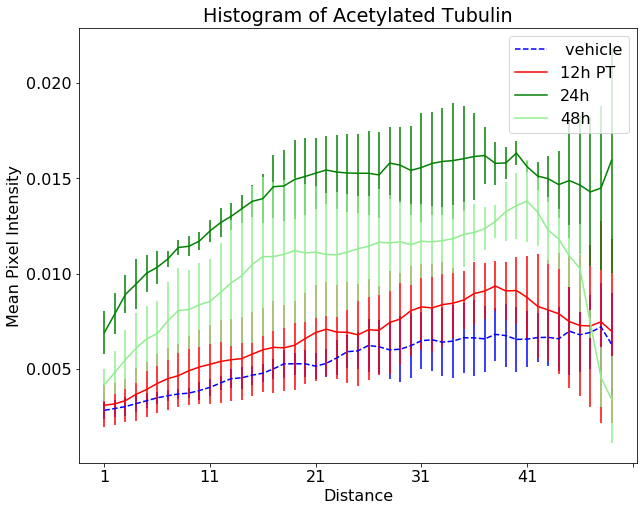

In [8]:
ax0 =  df_merged.plot(kind = "line", y = " vehicle", yerr = " vehicle std", linestyle='--', c='blue')
ax1 = df_merged.plot(ax=ax0, kind = "line", y = "12h PT", yerr = "12h PT std", c='red')
ax2 = df_merged.plot(ax=ax1, kind = "line", y = "24h", yerr = "24h std", c='green')
df_merged.plot(ax=ax2, kind = "line", y = "48h", yerr = "48h std", c='lightgreen')

plt.xlabel('Distance')
plt.ylabel('Mean Pixel Intensity')
plt.title("Histogram of Acetylated Tubulin")